Using cells selected in the ABC Atlas with Gene Expression data.
================================================================

The [Allen Brain Cell (ABC) Atlas](https://portal.brain-map.org/atlases-and-data/bkp/abc-atlas) is a powerfull tool for visualizing the data that are used throughout these notebooks. One particualar way users can interact with the ABC Atlas is by selecting and downloading specific cells from either a part of the taxonomy UMAP or brain region they are interested. This notebook will show how combine these cells selected from the ABC Atlas with gene expression data and metadata in these notebooks.

Note that the examples in this notebook can only be used with the Whole Mouse Brain (WMB) MERFISH and 10X data, the Zhuang et al. MERFISH data (1-4), and the Whole Human Brain (WHB) 10X data. The Seattle Alzheimer's Disease (SEA-AD) dataset is not currently available through this repository (Data and documentation for SEA-AD are [available here](https://portal.brain-map.org/explore/seattle-alzheimers-disease/seattle-alzheimers-disease-brain-cell-atlas-download?edit&language=en)).

For this notebook, the user should:
- Have some familiarity with using the ABC Atlas. If you are unsure of any steps used to manipulate data in the atlas visualization, you can refer to the user guide [here](https://community.brain-map.org/t/abc-atlas-user-guide/3179).
- Be using manifest versions equal to or greater than 20241115. Instructions on listing and changing versions can be found in the [Getting Started notebook](https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.ipynb).
- Be connected to the internet.
- Have run through the [Getting Started](https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.html) and other notebooks in this repo.

## Initializing required modules and instantiating the AbcProjectCache.

In [1]:
import anndata
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from PIL import Image

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

We will interact with the data using the **AbcProjectCache**. This cache object tracks which data has been downloaded and serves the path to the requsted data on disk. For metadata, the cache can also directly serve a up a Pandas Dataframe. See the ``getting_started`` notebook for more details on using the cache including installing it if it has not already been.

**Change the download_base variable to where you have downloaded the data in your system.**

In [2]:
download_base = Path('../../data/abc_atlas')
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20250531/manifest.json'

## Selecting Data in the ABC Atlas.

For this example we'll be looking at the WMB MERFISH dataset within ABC Atlas. We'll filter the data by a specific subtype and region and then select cells from a specific MERFISH slice. You can refer to [this linked view](https://knowledge.brain-map.org/abcatlas#AQEBSzlKTjIzUDI0S1FDR0s5VTc1QQACSFNZWlBaVzE2NjlVODIxQldZUAADBwFGUzAwRFhWMFQ5UjFYOUZKNFFFAAIAAAFRWTVTOEtNTzVITEpVRjBQMDBLAAIBMDIyIEw1IEVUIENUWCBHbHV0AAABMTVCSzQ3RENJT0YxU0xMVVc5UAACAAABQ0JHQzBVMzBWVjlKUFI2MFRKVQACAAABNzNHVlREWERFR0UyN00yWEpNVAACAAABSTlMTlAwTzFSTjhLNFNOMkdXWQACAVZJU3BtAAABVEZRRkxORVAzVjIyMlk4OEM2NAACAAAEAQAChexuHYN%2B0KIDg7ChtYNCd2oEMk5RVElFN1RBTVA4UFFBSE80UAAFga%2BmSoHprA6BoIFHgJLV6AYABwAABQAGAQECRlMwMERYVjBUOVIxWDlGSjRRRQADfgAAAAQAAAhWRk9GWVBGUUdSS1VEUVVaM0ZGAAlMVkRCSkFXOEJJNVlTUzFRVUJHAAoACwFUTE9LV0NMOTVSVTAzRDlQRVRHAAI3M0dWVERYREVHRTI3TTJYSk1UAAMBBAEAAiMwMDAwMDAAA8gBAAUBAQIjMDAwMDAwAAPIAQAAAAIBAA%3D%3D) of the atlas to see the cells we will be selecting.

The cells we select come from  the `L5 ET CTX Glut` subclass, we'll also filter on only cells in the VISpm sub-region of the Isocortex. This initial selection leaves 325 cells that overlap with our filters. We'll use the select tool (dashed box in the upper corner in the linked ABC Atlas view) to select the cells in section 31 of our MERFISH data. Refer to the image below to see our selection and where these selected cells reside (in addition to the above link).

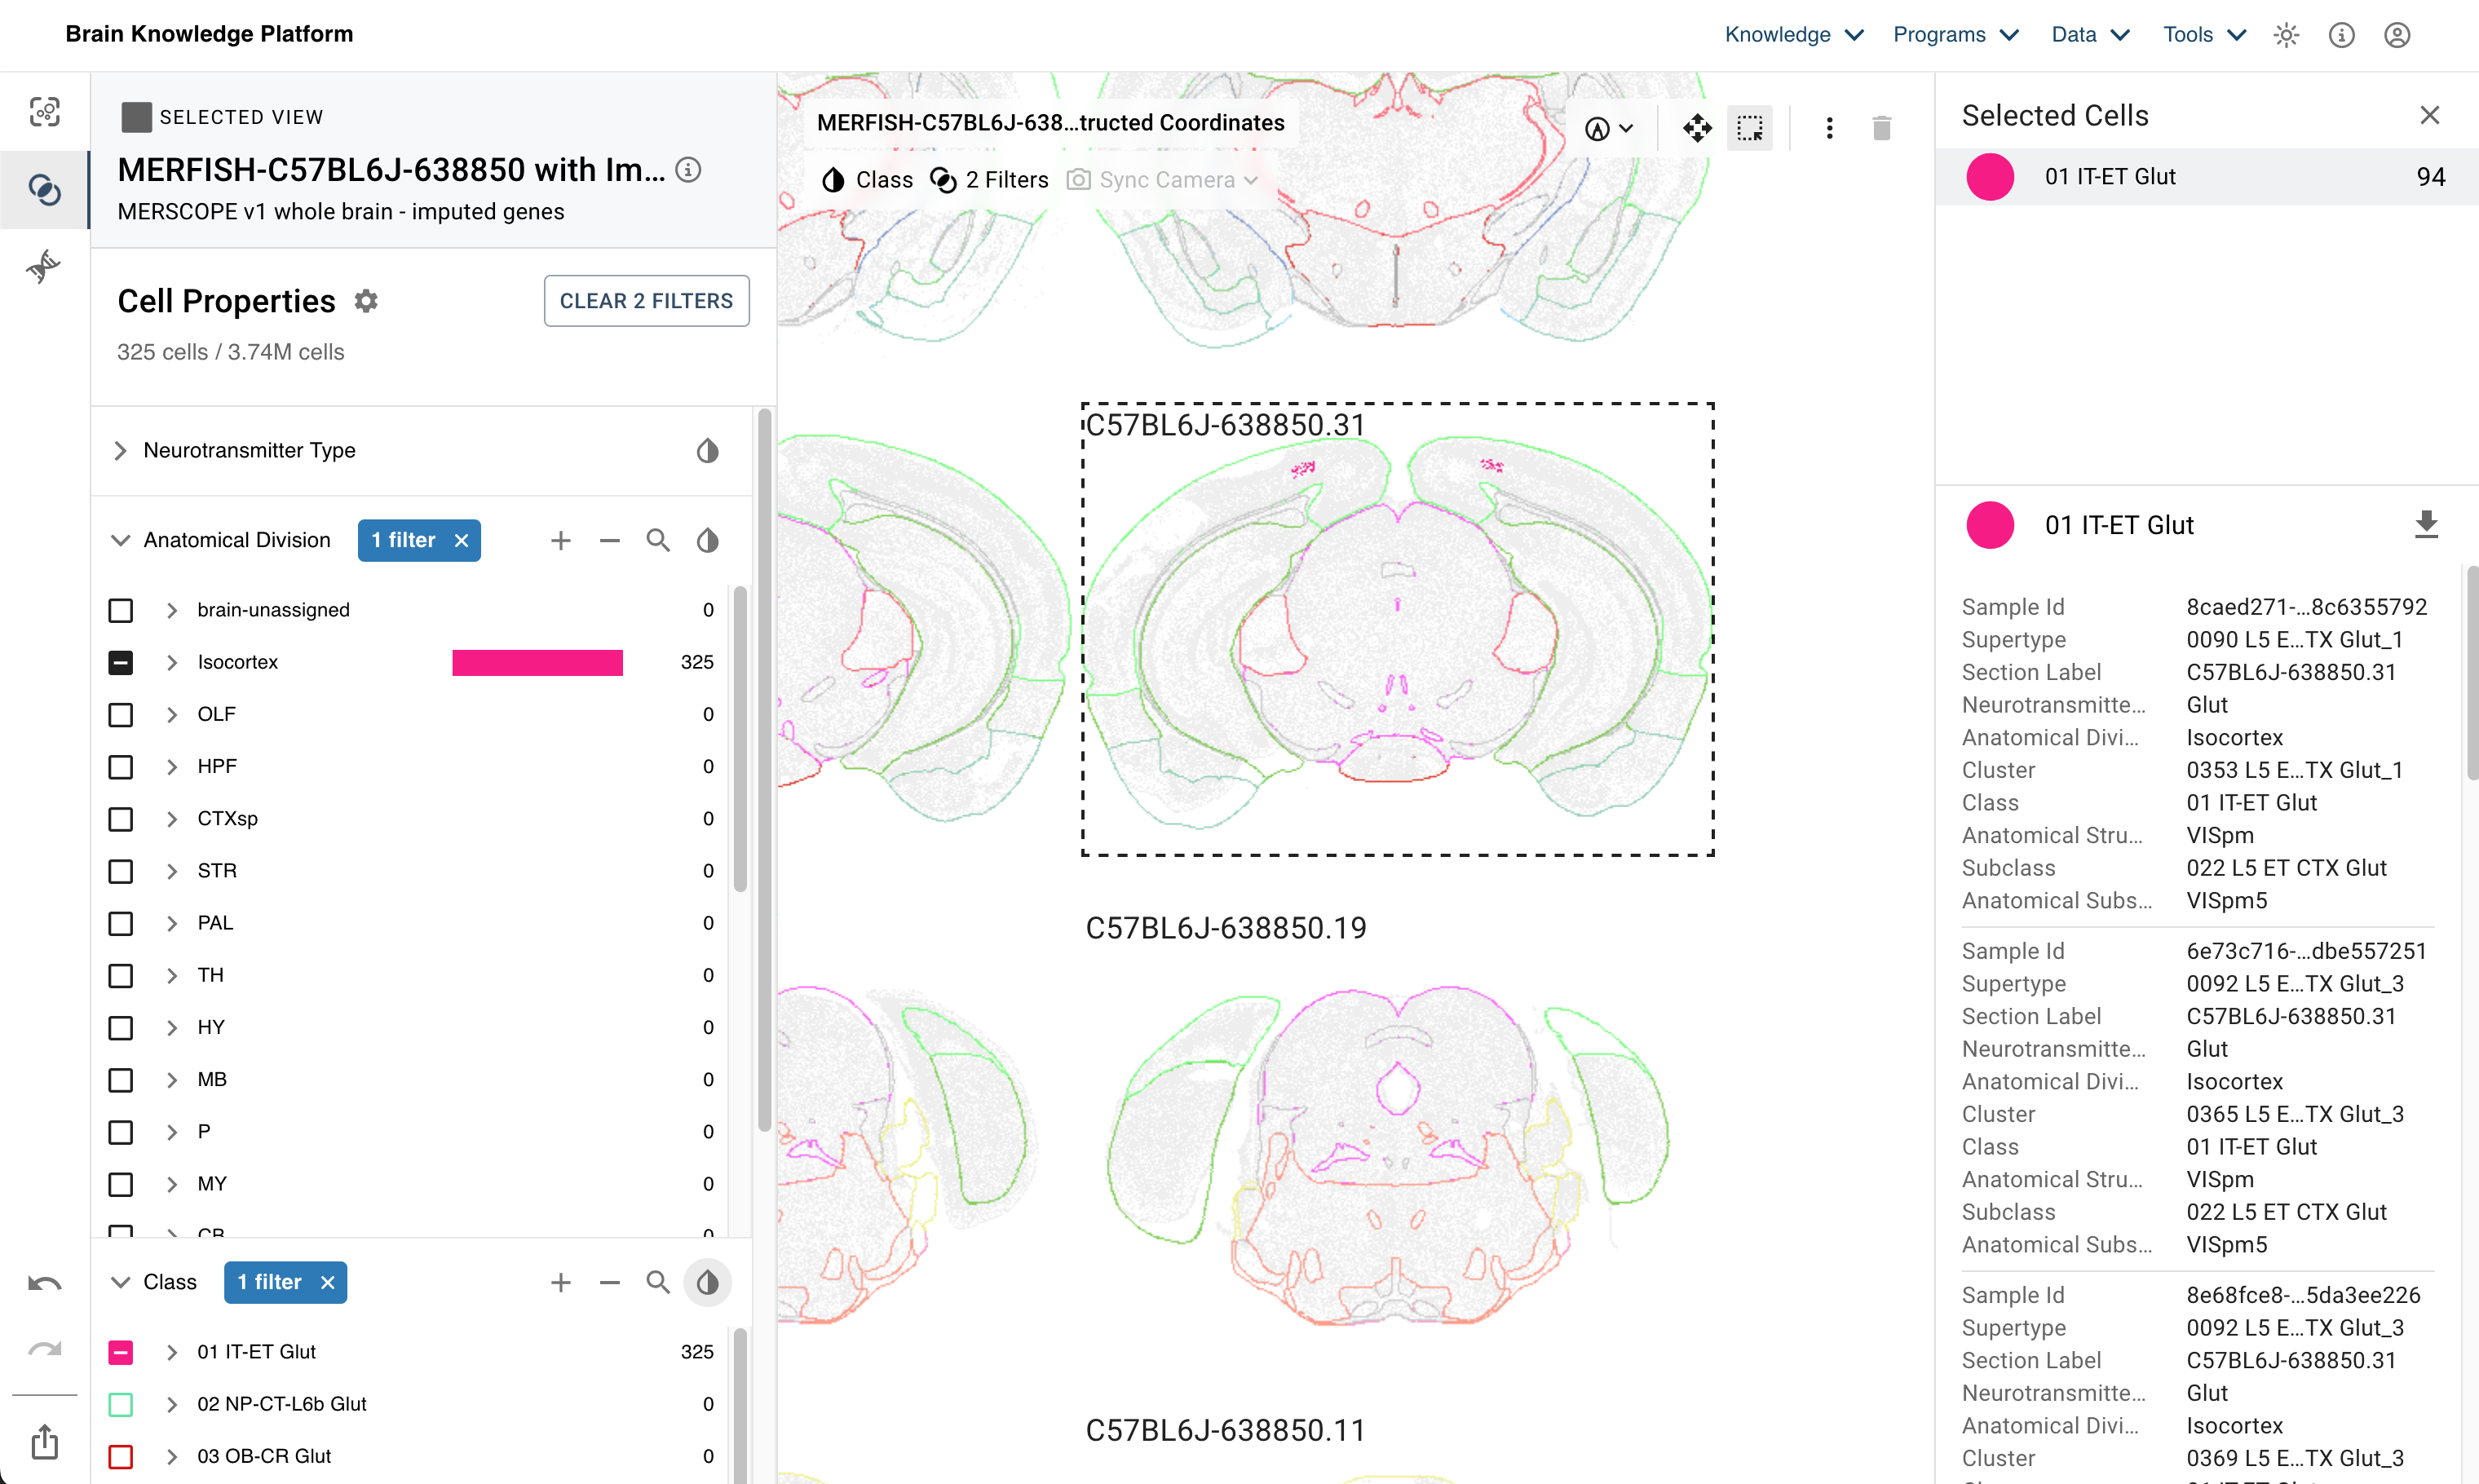

In [3]:
image = Image.open('data/abc_atlas_selection_merfish.png')
image

This gives us 94 cells in our final selection. We download the file by clicking the download arrow on the far right just above our listed, selected cells. This specific selection is provided in the file [`ABC_Atlas_Class_01 IT-ET Glut_cells_2024_10_23_16_42.csv`](https://github.com/AllenInstitute/abc_atlas_access/blob/9c9cd714f9f0265a1b9b2d1cd4875c274d36aec2/notebooks/data/ABC_Atlas_Class_01%20IT-ET%20Glut_cells_2024_10_23_16_42.csv) that is packaged in this repo with the notebooks.

## Combining with the cell metadata.

Now that we have our subset of cells selected from the ABC Atlas, we can combine them with the cell metadata provided by the `AbcProjectCache` object. 

The files `cell_metadata` in the projects/directories MERFISH-C57BL6J-638850, WHB-10Xv3, WMB-10X, Zhuang-ABCA-[1-4] contain a column `abc_sample_id` that allows for merging of data downloaded from an ABC Atlas visualization. Note that only the specific files called `cell_metadata` contain this id. Other derived metadata such as `cell_metadata_with_cluster_annotation` do not contain this id though it can be easily merged in.

Here we'll just display a few columns of the cell_metadata table. For specifics on the MERFISH metadata and gene expression data used in this example, see the [notebooks related this MERFISH dataset](https://alleninstitute.github.io/abc_atlas_access/descriptions/notebook_subtitle3.html)

In [4]:
cell_metadata = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850',
    file_name='cell_metadata',
    dtype={"cell_label": str},
)
cell_metadata.set_index('cell_label', inplace=True)
cell_metadata.head()[['brain_section_label', 'abc_sample_id']]

,brain_section_label,abc_sample_id
cell_label,,
1019171907102340387-1,C57BL6J-638850.37,c9881423-76a7-4835-ba8b-7942fd384b6b
1104095349101460194-1,C57BL6J-638850.26,aa815488-6487-4e47-8a5e-d82ac9933bc6
1017092617101450577,C57BL6J-638850.25,91ef7a85-8e3e-4410-8ee2-785788df3ebe
1018093344101130233,C57BL6J-638850.13,18991e17-fbd3-4ba0-9c60-1281f56ac520
1019171912201610094,C57BL6J-638850.27,5e155936-e40d-4c6b-8971-e7fb0079274b


Now we load our selected cells. Note that we rename the `Sample Id` column to match the one in our cell metadata.

In [5]:
# Change path location below to either your own downloaded cells
# or the location of the csv from this repo (abc_atlas_access/notebooks/ABC_Atlas_Class_01 IT-ET Glut_cells_2024_10_23_16_42.csv)
downloaded_cells_path = Path('data/ABC_Atlas_Class_01 IT-ET Glut_cells_2024_10_23_16_42.csv')

abc_atlas_selection = pd.read_csv(downloaded_cells_path)
abc_atlas_selection.rename(
    columns={'Sample Id': 'abc_sample_id'},
    inplace=True
)
abc_atlas_selection.set_index('abc_sample_id', inplace=True)
abc_atlas_selection.head()

,Supertype,Section Label,Neurotransmitter Type,Anatomical Division,Cluster,Class,Anatomical Structure,Subclass,Anatomical Substructure
abc_sample_id,,,,,,,,,
e23109f2-b70b-48a0-b29f-f4cfd24025ac,0090 L5 ET CTX Glut_1,C57BL6J-638850.31,Glut,Isocortex,0352 L5 ET CTX Glut_1,01 IT-ET Glut,VISpm,022 L5 ET CTX Glut,VISpm5
d42c7e04-95f7-4134-93e8-66acc1a52aa3,0091 L5 ET CTX Glut_2,C57BL6J-638850.31,Glut,Isocortex,0359 L5 ET CTX Glut_2,01 IT-ET Glut,VISpm,022 L5 ET CTX Glut,VISpm5
cfc13cd0-adf7-41c4-a849-f1472ea31567,0091 L5 ET CTX Glut_2,C57BL6J-638850.31,Glut,Isocortex,0359 L5 ET CTX Glut_2,01 IT-ET Glut,VISpm,022 L5 ET CTX Glut,VISpm5
e98716b6-15c2-4f54-8717-589b0da6d246,0090 L5 ET CTX Glut_1,C57BL6J-638850.31,Glut,Isocortex,0352 L5 ET CTX Glut_1,01 IT-ET Glut,VISpm,022 L5 ET CTX Glut,VISpm5
a28ebb39-2849-49ae-80e4-ee135fce1890,0092 L5 ET CTX Glut_3,C57BL6J-638850.31,Glut,Isocortex,0369 L5 ET CTX Glut_3,01 IT-ET Glut,VISpm,022 L5 ET CTX Glut,VISpm5


Now we can use pandas functionality to inner join together to two tables, leaving only the subset of cells, 94, that we selected in the ABC Atlas visualization.

In [6]:
selected_cells = cell_metadata.join(abc_atlas_selection, on='abc_sample_id', how='inner')
print(len(selected_cells))
selected_cells.head()

94


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,abc_sample_id,Supertype,Section Label,Neurotransmitter Type,Anatomical Division,Cluster,Class,Anatomical Structure,Subclass,Anatomical Substructure
cell_label,,,,,,,,,,,,,,,,,,,,
1018093345102260085,C57BL6J-638850.31,384,0.651028,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.087788,3.208372,5.4,21c31354-1979-4b93-b6f2-acaefaa22842,0091 L5 ET CTX Glut_2,C57BL6J-638850.31,Glut,Isocortex,0360 L5 ET CTX Glut_2,01 IT-ET Glut,VISpm,022 L5 ET CTX Glut,VISpm5
1018093345101290596,C57BL6J-638850.31,384,0.737842,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.753508,3.045020,5.4,484abbf0-56d4-4622-add2-24920cd3cd05,0091 L5 ET CTX Glut_2,C57BL6J-638850.31,Glut,Isocortex,0360 L5 ET CTX Glut_2,01 IT-ET Glut,VISpm,022 L5 ET CTX Glut,VISpm5
1018093345102270314,C57BL6J-638850.31,393,0.685347,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.936859,3.295320,5.4,147ac3d0-b2f2-4e1c-bd00-e1b740b242bc,0091 L5 ET CTX Glut_2,C57BL6J-638850.31,Glut,Isocortex,0364 L5 ET CTX Glut_2,01 IT-ET Glut,VISpm,022 L5 ET CTX Glut,VISpm5
1018093345102260156,C57BL6J-638850.31,383,0.808770,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.042362,3.188116,5.4,eaf8a6aa-2ccd-474b-ac40-5bcbc705e2eb,0091 L5 ET CTX Glut_2,C57BL6J-638850.31,Glut,Isocortex,0359 L5 ET CTX Glut_2,01 IT-ET Glut,VISpm,022 L5 ET CTX Glut,VISpm5
1018093345101290474,C57BL6J-638850.31,383,0.536743,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.833381,2.998880,5.4,e4874d7b-6754-40ff-8792-c0b7627f2bce,0091 L5 ET CTX Glut_2,C57BL6J-638850.31,Glut,Isocortex,0359 L5 ET CTX Glut_2,01 IT-ET Glut,VISpm,022 L5 ET CTX Glut,VISpm5


Let's do a quick plot to show that we can grossly reproduces the view of MERFISH section 31.

In [7]:
def plot_section(xx, yy, cc = None, val = None, fig_width = 8, fig_height = 8, cmap = None, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots()
        fig.set_size_inches(fig_width, fig_height)
    if cmap is not None:
        plt.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
    elif cc is not None:
        plt.scatter(xx, yy, s=0.5, color=cc, marker='.')
    ax.set_ylim(11, 0)
    ax.set_xlim(0, 11)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return fig, ax

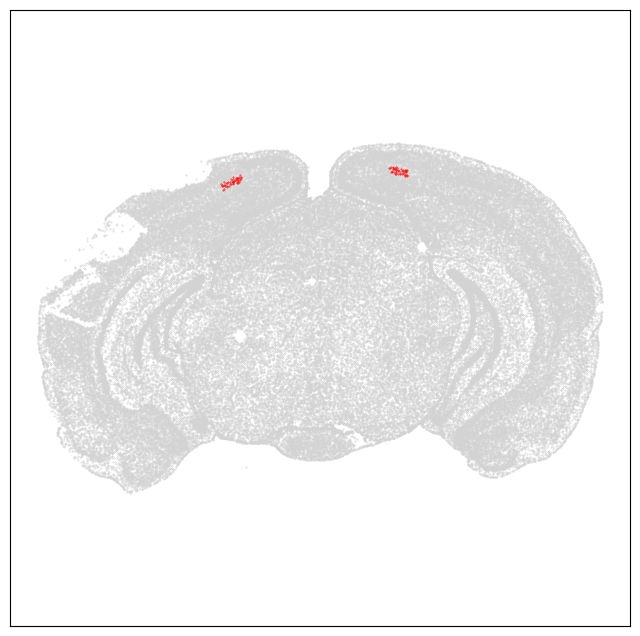

In [8]:
pred = (cell_metadata['brain_section_label'] == 'C57BL6J-638850.31')
section = cell_metadata[pred]
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
# Plot all cells as grey.
fig_all, ax_all = plot_section(section['x'], section['y'], cc='#D3D3D3', fig=fig, ax=ax)
# Plot our selected cells as red
fig_sel, ax_sel = plot_section(selected_cells['x'], selected_cells['y'], cc='red', fig=fig, ax=ax)
plt.show()

## Using the matched data in a cell by gene matrix.

Now that we have have our matched metadata we can simply use the index of our final combined Pandas DataFrame with our cell by gene data. Since we are working with data from an individual MERFISH slice, we can download that directly. If you are doing this with the 10X data, you should use the `get_gene_data` function tutorialized in the [`general_accessing_10x_snRNASeq_tutorial`](https://alleninstitute.github.io/abc_atlas_access/notebooks/general_accessing_10x_snRNASeq_tutorial.html) notebook.

First we need to load our gene list giving a mapping from identifier to symbol.

In [9]:
gene = abc_cache.get_metadata_dataframe(directory='MERFISH-C57BL6J-638850', file_name='gene').set_index('gene_identifier')
gene.head()

,gene_symbol,transcript_identifier,name,mapped_ncbi_identifier
gene_identifier,,,,
ENSMUSG00000026778,Prkcq,ENSMUST00000028118,"protein kinase C, theta",NCBIGene:18761
ENSMUSG00000026837,Col5a1,ENSMUST00000028280,"collagen, type V, alpha 1",NCBIGene:12831
ENSMUSG00000001985,Grik3,ENSMUST00000030676,"glutamate receptor, ionotropic, kainate 3",NCBIGene:14807
ENSMUSG00000039323,Igfbp2,ENSMUST00000047328,insulin-like growth factor binding protein 2,NCBIGene:16008
ENSMUSG00000048387,Osr1,ENSMUST00000057021,odd-skipped related transcription factor 1,NCBIGene:23967


Now we'll load and process the data. Selecting by cell id in our data files (even for large ones) is mostly safe on machines with smaller memory footprints. This is assuming one uses the `backed` option and doesn't attempt to load too many cells (<1000 say). For larger files, the user will want to be carefulas  most of the anndata files we release cannot be loaded into memory on a smaller scale computer. For an example of doing this, or loading across 10X that has been divided into multiple files, see the [General Accesing 10X data notebook](general_accessing_10x_snRNASeq_tutorial.ipynb)

In [11]:
# Load the anndata, cell by gene matrix.
file_path = abc_cache.get_file_path(
    directory='MERFISH-C57BL6J-638850-sections',
    file_name='C57BL6J-638850.31/log2'
)
adata = anndata.read_h5ad(file_path, backed='r')
# Create a landing Pandas DataFrame for the data.
selected_cell_gene_data = pd.DataFrame(index=selected_cells.index,
                                       columns=adata.var.index)

# Find the subset of cells we selected in the full matrix.
mask = adata.obs.index.isin(selected_cells.index)
# Fill our DataFrame with the 
selected_cell_gene_data.loc[selected_cells.index, adata.var.index] = adata.X[mask].toarray()
selected_cell_gene_data.columns = gene.gene_symbol

C57BL6J-638850.31-log2.h5ad: 100%|██████████| 190M/190M [00:23<00:00, 8.20MMB/s]    


In [12]:
selected_cell_gene_data

gene_symbol,Prkcq,Col5a1,Grik3,Igfbp2,Osr1,Syt6,Cntnap3,Lmo3,Ntn1,Otp,...,Blank-16,Blank-32,Blank-18,Blank-4,Blank-28,Blank-33,Blank-34,Blank-45,Blank-23,Blank-48
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093345102260085,0.0,0.0,0.900271,1.847696,0.0,0.900271,0.0,0.900271,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018093345101290596,0.0,0.0,1.498822,0.685901,0.0,0.0,0.0,1.148877,1.780236,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018093345102270314,0.0,0.0,1.429679,1.429679,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018093345102260156,0.0,0.0,2.150413,1.907521,0.0,0.0,0.0,0.755238,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.755238,0.0
1018093345101290474,0.0,0.0,1.591793,0.0,0.0,0.0,1.591793,1.591793,0.0,1.591793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093345102270545,0.0,0.0,0.663865,0.0,0.0,0.663865,0.0,1.116793,0.0,0.0,...,0.0,0.663865,0.0,1.116793,0.0,0.0,0.0,0.0,0.0,0.0
1018093345102270307,0.0,0.0,1.264144,2.094565,0.0,0.553146,0.0,0.952008,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018093345102270242,0.0,0.0,1.782628,0.0,0.0,0.0,0.0,1.782628,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This process can be repeated for the all other ABC Atlas visualizations (except SEA-AD which we do not currently released through this package). Here is a list of datasets in the `AbcProjectCache` that contain the `abc_sample_id` with links to their Abc Atlas bisualizations:
- [MERFISH-C57BL6J-638850](https://knowledge.brain-map.org/abcatlas#AQEBSzlKTjIzUDI0S1FDR0s5VTc1QQACSFNZWlBaVzE2NjlVODIxQldZUAADAAQBAAKE%2FDwdg14ZMgOFdjNXhRhBHAQyTlFUSUU3VEFNUDhQUUFITzRQAAWBr6ZKgemsDoGggUeAktXoBgAHAAAFAAYBAQJGUzAwRFhWMFQ5UjFYOUZKNFFFAAN%2BAAAABAAACFZGT0ZZUEZRR1JLVURRVVozRkYACUxWREJKQVc4Qkk1WVNTMVFVQkcACgALAVRMT0tXQ0w5NVJVMDNEOVBFVEcAAjczR1ZURFhERUdFMjdNMlhKTVQAAwEEAQACIzAwMDAwMAADyAEABQEBAiMwMDAwMDAAA8gBAAAAAgEA)
- [WHB-10Xv3](https://knowledge.brain-map.org/abcatlas#AQIBOU02NEo3UzBBM1pOSUpBNFZTNgACR1o5NFo4M1JYVVRFQ0hZS1FPNAADAAQBAQJ%2FQEmofIMKAQOFBF5thmxgWAAFAAYBAQJYM0s3SzJFRzZVTVhPTjBUOUJFAAN%2BAAAABAAACFVNWko3WkxGOEc1Rkg1UzlZNFUACUMzUlJWQUsxOEhHNlExSk42WlEACgAAATlNNjRKN1MwQTNaTklKQTRWUzYAAlI1RldVVlRFQTJPVzlOSlFNWTkAAwAEAQECgYCoM34%2F4yADhYQxZ4a8jlIABQAGAQECWDNLN0syRUc2VU1YT04wVDlCRQADfgAAAAQAAAg1VDRDM01DM0xOWldFQkRGVUVaAAlDM1JSVkFLMThIRzZRMUpONlpRAAoAAAIDAA%3D%3D)
- [WMB-10X](https://knowledge.brain-map.org/abcatlas#AQEBQVA4Sk5ONUxZQUJHVk1HS1kxQgACUTFOQ1dXUEc2RlowRE5JWEpCUQADAAQBAQKBEIB4gZSwRAOEjCuShFgYTQAFAAYBAQJGUzAwRFhWMFQ5UjFYOUZKNFFFAAN%2BAAAABAAACEc0STRHRkpYSkI5QVRaM1BUWDEACUxWREJKQVc4Qkk1WVNTMVFVQkcACgALAW5vbmUAAm5vbmUAAwEEAQACIzAwMDAwMAADyAEABQEBAiMwMDAwMDAAA8gBAAAAAgEA)
- [Zhuang-ABCA-(1-4)](https://knowledge.brain-map.org/abcatlas#AQQBVTVWOTRFUzRKNzZNWVNMN1FMNwACWkdDQlk2MkowTEZLWjU4SklVRQADAAQBAAKENP98hIBpkgOFsotPhbZEPAAFAAYBAQJGUzAwRFhWMFQ5UjFYOUZKNFFFAAN%2BAAAABAAACE1HQTVMVVRINEVUTTg1OUw1SU0ACTVDMDIwMUpTVkUwNFdZNkRNVkMACgAAAUpaUEg4UjFINjBDNDFOMDJVQjIAAk9BN0oyS0JWTkRMMjIwTkRNSzkAAwAEAQACg2DtGYMWxFIDhORlYYRYGE0ABQAGAQECRlMwMERYVjBUOVIxWDlGSjRRRQADfgAAAAQAAAhCQTVEUDczVVI2WjRCWk5GOThIAAk1QzAyMDFKU1ZFMDRXWTZETVZDAAoAAAE4VEtQQzRCVFRTSE0zSEZXWDFYAAJENDJSNlhLN0I2Uks0VTE4UUE0AAMABAEAAoOWSu%2BDlkrvA4WW4BOFKAcEAAUABgEBAkZTMDBEWFYwVDlSMVg5Rko0UUUAA34AAAAEAAAIMDQwTFRLQzZGWjRORFQyQURZQgAJNUMwMjAxSlNWRTA0V1k2RE1WQwAKAAABWE1GWEdISzVITE40NkJVUTFTUgACMllXWUFBVUpZWVcyN09HMlUwWgADAAQBAAKDWIELggwQ%2FAOErP0ahKC7CgAFAAYBAQJGUzAwRFhWMFQ5UjFYOUZKNFFFAAN%2BAAAABAAACFBYVVNYWExJMlNBNUdOSDRITzYACTVDMDIwMUpTVkUwNFdZNkRNVkMACgAAAggA)